In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
data = pd.read_csv(r"C:\Users\Neha N A\OneDrive\Desktop\disease big data.csv")

THE CSV FILE IS UPLOADED FOR ANALYSIS

In [4]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Inspect the unique values for columns to identify binary encoding needs
print(data.nunique())

# Binary encoding: Convert categorical symptoms to binary
symptoms = data.columns[:-1]  # Excluding the 'disease' column

# Convert categorical symptom values to 0 or 1
for col in symptoms:
    data[col] = data[col].apply(lambda x: 1 if x != '0' and x != 0 else 0)

# Drop any irrelevant columns
data = data.drop(columns=['unnamed:_29'])

# Handle missing values
data = data.fillna(0)

# Display the cleaned data
print(data.head())

fever                                        2
cough                                        2
fatigue                                      2
shortness_of_breath                          2
loss_of_taste                                2
loss_of_smell                                2
sore_throat                                  2
headache                                     2
nausea                                       2
vomiting                                     2
seizures                                     2
vision_problems                              2
speech_difficulties                          2
balance_problems                             2
personality_changes                          2
memory_loss                                  2
confusion_with_time_or_place                 2
trouble_understanding_visual_images          2
new_problems_with_words                      2
misplacing_things                            2
withdrawal_from_work_or_social_activities    2
changes_in_mo

PREPROCESSING OF DATA IS COMPLETED.IT SHOWS WE HAVE ONLY 2 TYPES OF DATA IN EACH SYMPTOM.(SYMPTOM POSITIVE OR NEGATIVE)

            fever       cough     fatigue  shortness_of_breath  loss_of_taste  \
count  194.000000  194.000000  194.000000           194.000000     194.000000   
mean     0.128866    0.159794    0.242268             0.123711       0.123711   
std      0.335918    0.367363    0.429564             0.330104       0.330104   
min      0.000000    0.000000    0.000000             0.000000       0.000000   
25%      0.000000    0.000000    0.000000             0.000000       0.000000   
50%      0.000000    0.000000    0.000000             0.000000       0.000000   
75%      0.000000    0.000000    0.000000             0.000000       0.000000   
max      1.000000    1.000000    1.000000             1.000000       1.000000   

       loss_of_smell  sore_throat    headache      nausea    vomiting  ...  \
count     194.000000   194.000000  194.000000  194.000000  194.000000  ...   
mean        0.113402     0.128866    0.226804    0.118557    0.128866  ...   
std         0.317904     0.335918   

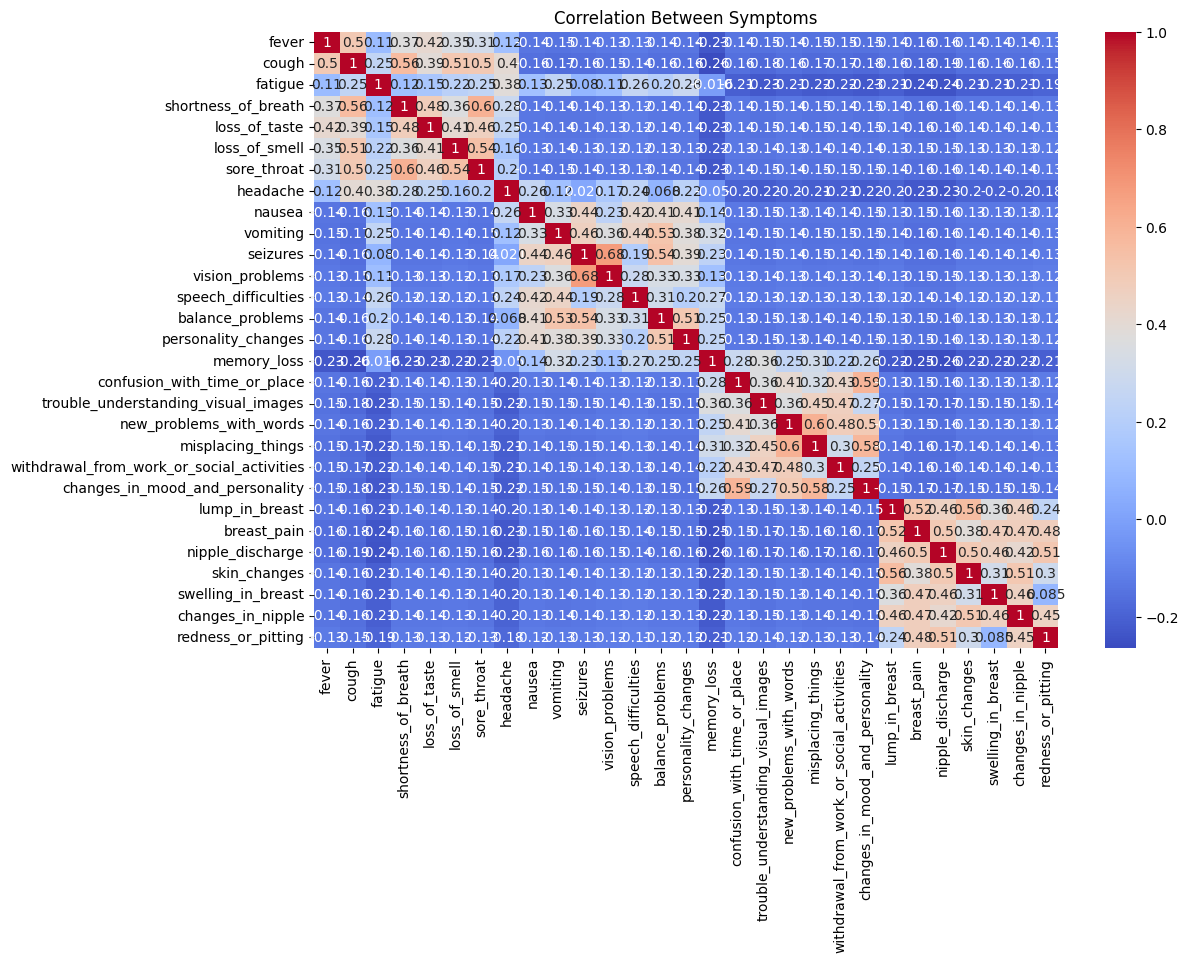

In [5]:
if 'unnamed:_29' in data.columns:
    data = data.drop(columns=['unnamed:_29'])

# Recalculate the symptoms list
symptoms = data.columns[:-1]  

# Basic statistics
print(data.describe())

# Correlation between symptoms
symptom_correlation = data[symptoms].corr()

# Plotting the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(symptom_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Symptoms')
plt.show()

THIS PART OF CODE DESCRIBES THE DATA AND GIVES A CORRELATION CHART WHICH SHOWS THE RELATIONSHIP VALUE BETWEEN EACH SYMPTOMS TO EACH OTHER SYMPTOMS.

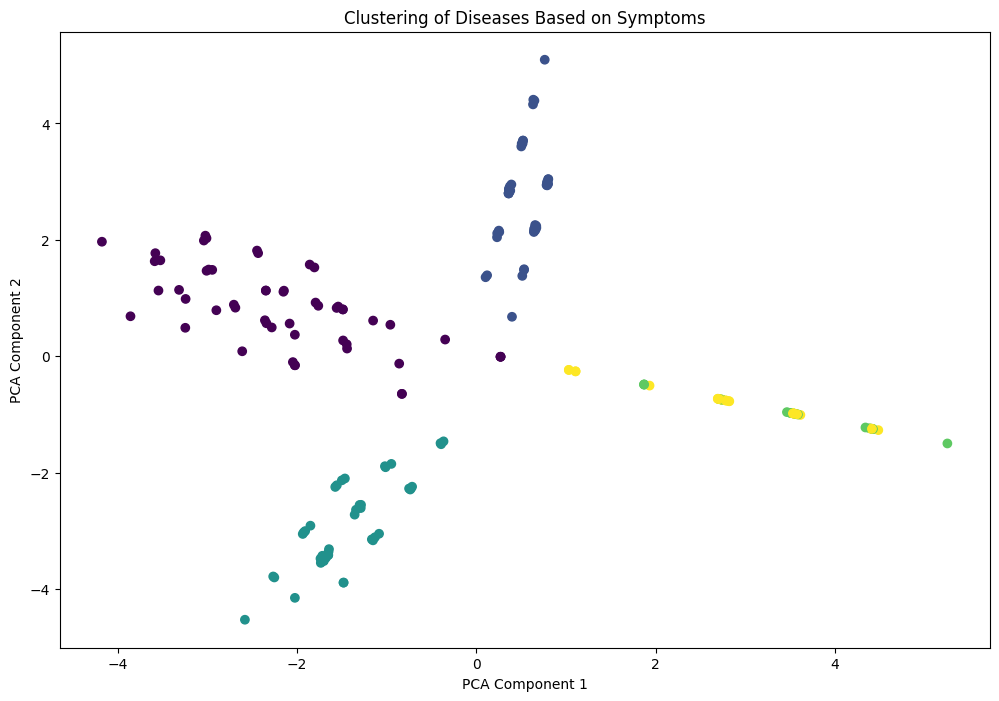

In [16]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[symptoms])

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Plotting the clusters
plt.figure(figsize=(12, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.title('Clustering of Diseases Based on Symptoms')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


CLUSTURING EVERY SIMILAR DATA TOGETHER.HERE THE ANALYSIS SHOWS CORONA AND BRAIN TUMOR HAS SOME SIMILAR SYMPTOMS AND BRAIN TUMOR AND ALZHEIMER HAS MEMORY LOSS AS ITS SIMILAR SYMPTOM.

In [17]:
from mlxtend.frequent_patterns import apriori, association_rules

# Applying Apriori algorithm
frequent_itemsets = apriori(data[symptoms], min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the rules
print(rules)


  antecedents consequents  antecedent support  consequent support   support  \
0   (fatigue)  (headache)            0.242268            0.226804  0.123711   
1  (headache)   (fatigue)            0.226804            0.242268  0.123711   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.510638  2.251451  0.068764    1.580009       0.733560  
1    0.545455  2.251451  0.068764    1.667010       0.718889  


c:\Users\Neha N A\anaconda3\anaconda\envs\pytorch\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


MLXTEND IS USED TO GET INTERESTING RELATIONSHIPS BETWEEN SYMPTOMS.ANTECEDENT (IF) CONSEQUENTS (THEN) .THIS SHOWS IF FATIGUE IS ONE OF THE SYMPTOM THEN HEADACHE WILL ALSO BE A SYMPTOM.NOT ALWAYS BUT THERE IS A HIGH SUPPORT FOR THE POSSIBILITY.

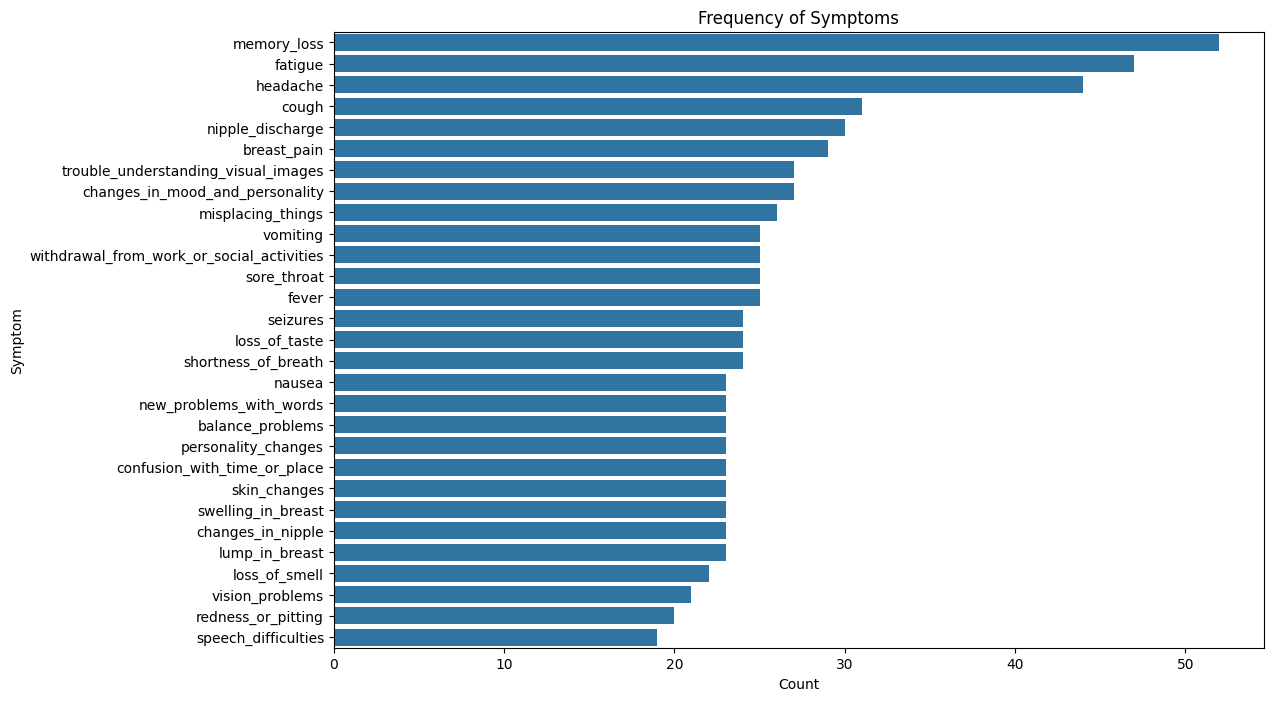

In [18]:
# Frequency of each symptom
symptom_counts = data[symptoms].sum().sort_values(ascending=False)

# Plotting the most common symptoms
plt.figure(figsize=(12, 8))
sns.barplot(x=symptom_counts.values, y=symptom_counts.index)
plt.title('Frequency of Symptoms')
plt.xlabel('Count')
plt.ylabel('Symptom')
plt.show()

GRAPH SHOWS THE FREQUENCY OF THE SYMPTOMS. AS MEMORY LOSS IS COMMON FOR BOTH BRAIN TUMOR AND ALZHEIMER IT HAS THE HIGHEST FREQUENCY OF SYMPTOMS.

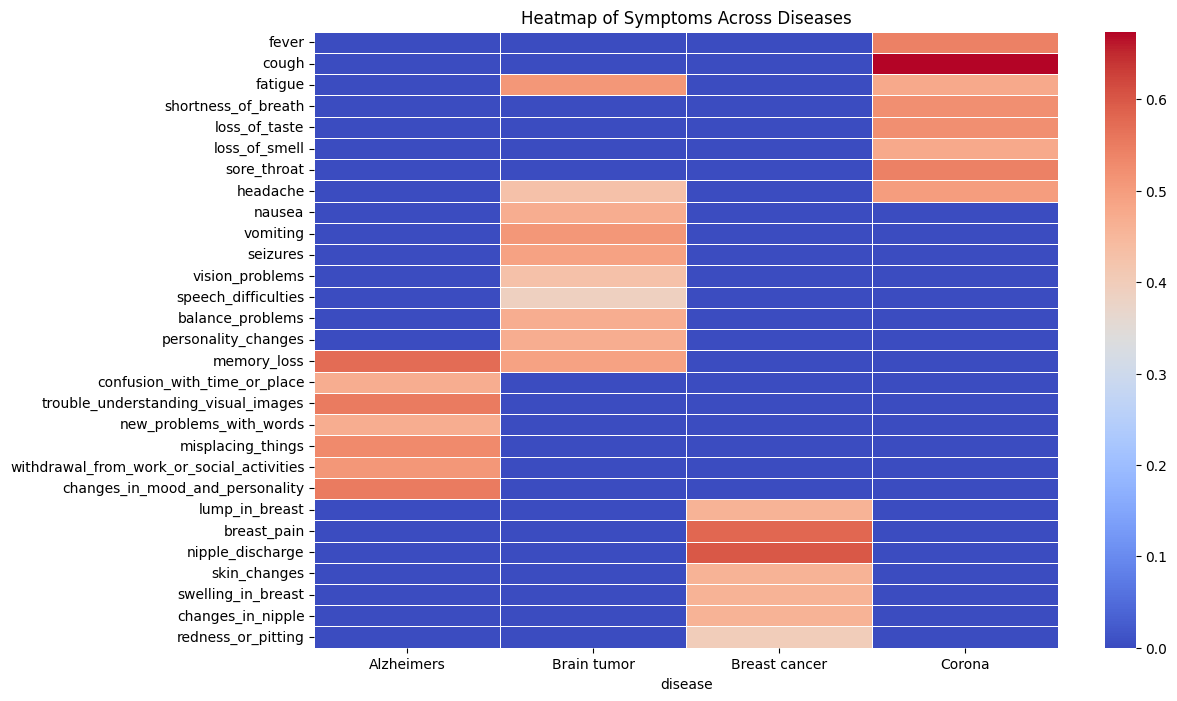

In [19]:
disease_symptom_distribution = data.groupby('disease')[symptoms].mean()

# Visualizing the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(disease_symptom_distribution.T, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Symptoms Across Diseases')
plt.show()

HEAT MAP SHOWS THE POSSIBILITY RANGE OF THE DISEASE USING RED SHADES. HIGHER THE SHADE OF SYMPTOM SHOWS HIGHER POSSIBILITY OF PARTICULAR DISEASE. EG:COUGH HAS THE HIGHER SHADE CCOMPARING TO SORE THROAT RESPECTIVE OF CORONA IN X AXIS.REDNESS OR PITTING IS THE MINIMUM POSSIBLE SYMPTOM IN BREAST CANCER.

In [23]:
# Calculate the symptom presence for each disease
disease_symptom_distribution = data.groupby('disease')[symptoms].sum()
# Find the most common symptom for each disease
most_common_symptoms = disease_symptom_distribution.idxmax(axis=1)
most_common_symptoms

disease
Alzheimers            memory_loss
Brain tumor               fatigue
Breast cancer    nipple_discharge
Corona                      cough
dtype: object

EVERY DISEASE HAS ONE MAIN MOST COMMON SYMPTOM EACH.THIS SYMPTOM INDICATES WE HAVE TO ANALYSE THE POSSIBILITY OF THAT PARTICULAR DISEASE BEFORE ALL.

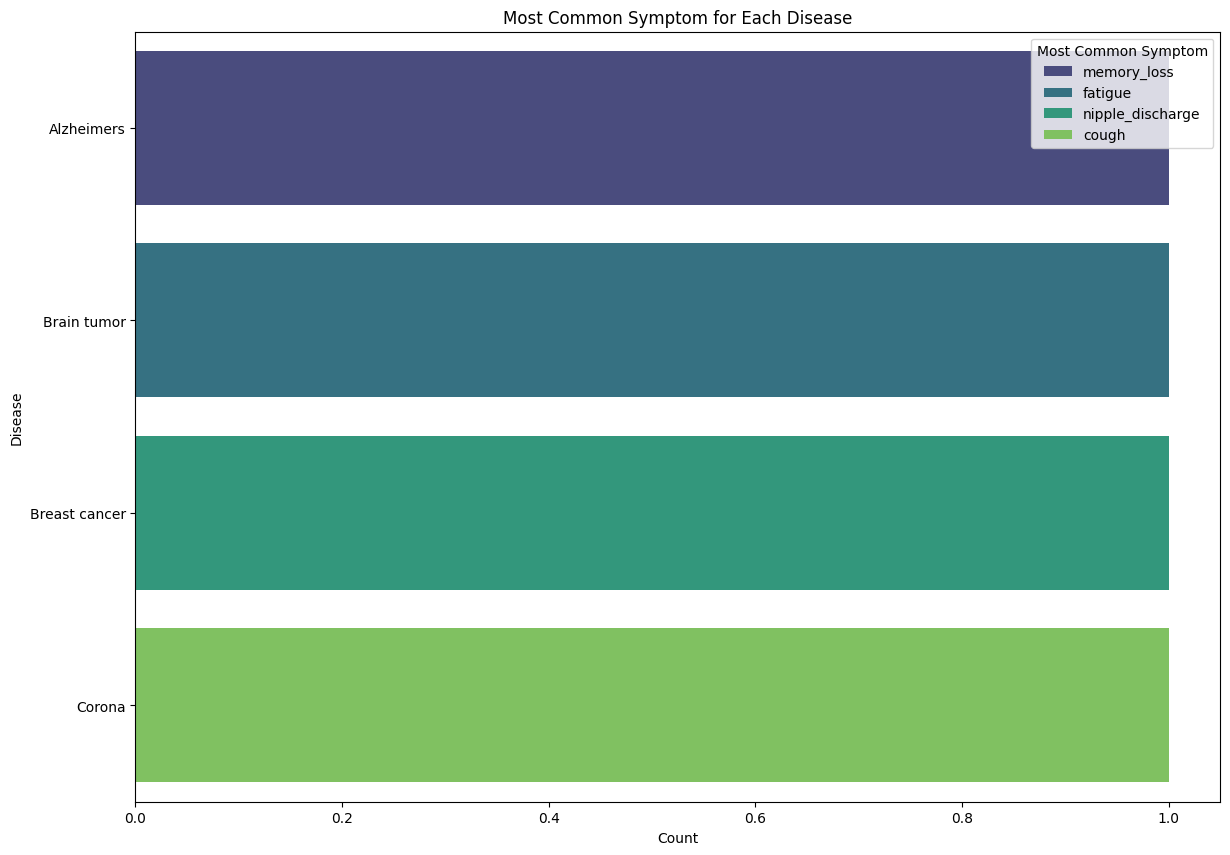

In [21]:
visualization_data = most_common_symptoms.reset_index()
visualization_data.columns = ['disease', 'most_common_symptom']

# Plotting the most common symptoms for each disease
plt.figure(figsize=(14, 10))
sns.countplot(data=visualization_data, y='disease', hue='most_common_symptom', palette='viridis')
plt.title('Most Common Symptom for Each Disease')
plt.xlabel('Count')
plt.ylabel('Disease')
plt.legend(title='Most Common Symptom')
plt.show()

SAME MOST COMMON SYMPTOM IS SHOWN VISUALLY.
EVENTHOUGH MEMORY LOSS IS COMMON FOR BRAIN TUMOR AND ALZHEIMERS WE HAVE TO FIRST ANALYSE THE POSSIBILITY OF ALZHEIMERS. 
FURTHER, PREDICTION AND SUGGESTION MODEL IS DONE USING NLP.